# Data Mining / Prospecção de Dados

## Diogo F. Soares and Sara C. Madeira, 2020/21

# Project 2 - Clustering

## Logistics 

**_Read Carefully_**

**Students should work in teams of 2 or 3 people**. 

Individual projects might be allowed (with valid justification), but will not have better grades for this reason. 

The quality of the project will dictate its grade, not the number of people working.

**The project's solution should be uploaded in Moodle before the end of `April, 18th (23:59)`.** 

Students should **upload a `.zip` file** containing all the files necessary for project evaluation. 
Groups should be registered in [Moodle](https://moodle.ciencias.ulisboa.pt/mod/groupselect/view.php?id=139096) and the zip file should be identified as `PDnn.zip` where `nn` is the number of your group.

**It is mandatory to produce a Jupyter notebook containing code and text/images/tables/etc describing the solution and the results. Projects not delivered in this format will not be graded. You can use `PD_202021_P2.ipynb`as template. In your `.zip` folder you should also include an HTML version of your notebook with all the outputs** (File > Download as > HTML).

**Decisions should be justified and results should be critically discussed.** 

_Project solutions containing only code and outputs without discussions will achieve a maximum grade 10 out of 20._

## Dataset and Tools

In this project you should use [Python 3](https://www.python.org), [Jupyter Notebook](http://jupyter.org) and **[Scikit-learn](http://scikit-learn.org/stable/)**.

The dataset to be analysed is **`medulloblastoma_genes.csv`**. It includes 76 samples of medulloblastoma (MB) with respective expression levels of 54.675 genes measured in children with ages between 3 and 16 years. Medulloblastoma is a malignant childhood brain tumour comprising four discrete subgroups. 

In this project you will consider the labels of the samples included in the `labels.csv` file where samples are labelled as MB-CL or Other. In this case, we have 51 samples of classic medulloblastoma (MB-CL) and 25 other types (namely: 6 desmoplastic nodular, 17 anaplastic and 2 medullomyoblastoma).

In `medulloblastoma_genes.csv` each line represents a sample and each column represents a gene.


**The goal is to cluster samples and (ideally) find "MB-CL" groups and "Other MB" groups.** 

## Team Identification

**GROUP NNN**

Students:

* Student 1 - n_student1
* Student 2 - n_student2
* Student 3 - n_student3

## 1. Load and Preprocess Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

At the end of this step you should have:
* a 76 rows × 54675 columns matrix, **X**, containing the values of the 54675 features for each of the 76 samples.
* a vector, **y**, with the 76 type of medulloblastoma, which you can use later to evaluate clustering quality.

The dataset to be analysed is **`medulloblastoma_genes.csv`**. It includes 76 samples of medulloblastoma (MB) with respective expression levels of 54.675 genes measured in children with ages between 3 and 16 years. Medulloblastoma is a malignant childhood brain tumour comprising four discrete subgroups. 

In [2]:
X = pd.read_csv("medulloblastoma_genes.csv")

In [3]:
X.to_pickle("./medulloblastoma_genes.pkl")

In [4]:
X = pd.read_pickle('medulloblastoma_genes.pkl')

In [5]:
X.isna().sum().sum() #checking for null values

0

In [6]:
X.duplicated().sum() #checking for duplicated features

0

In [7]:
X.rename(columns = {'Unnamed: 0': 'samples'}, inplace = True)

In [8]:
X.samples.nunique() #there are 76 unique samples

76

In [9]:
X_samples = X.samples

In [10]:
X.drop(['samples'],axis=1, inplace=True) #removing the id

In [11]:
X.shape

(76, 54675)

we reatched the objective of having 76 sample and 54675 genes for each sample

In [12]:
X#.head(2)

,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,7.59594,6.14440,4.82431,5.67092,4.14155,5.48935,6.01078,5.17671,4.83708,4.77996,...,10.23640,10.12020,11.5560,11.2308,6.94803,6.42487,6.70991,4.48639,4.43082,3.48738
1,7.80665,6.19154,5.24439,5.62149,3.41773,5.70478,5.98896,3.45316,4.34121,4.28772,...,10.47470,10.48930,11.6799,11.3475,6.09785,4.38328,4.68583,3.40120,4.20916,4.40915
2,7.60080,5.97406,5.36270,5.78598,3.32863,6.13340,6.09108,3.63495,5.12218,4.75875,...,10.85320,10.71250,11.9298,11.6038,6.49375,3.24259,3.91999,3.13114,4.02892,4.93087
3,7.40141,5.90781,4.80566,5.97838,4.21804,5.43677,6.10166,3.37417,4.46706,4.87672,...,10.19600,10.23420,11.4141,11.0352,6.98869,5.42978,6.07764,3.95700,4.04480,3.32504
4,7.54550,6.17877,5.79088,6.21800,4.61413,5.67710,4.95301,3.39451,4.51743,5.06449,...,10.43980,10.35610,11.4329,11.0906,6.62791,4.48300,5.89798,3.47816,4.40183,3.17388
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,7.46691,6.05819,4.56331,5.99396,4.59915,5.82275,5.29832,3.90197,5.40042,3.44362,...,10.70730,10.59980,11.5175,11.2067,6.45363,4.41401,4.89485,3.22684,3.74242,3.47507
72,7.50064,6.38873,4.13677,5.98419,4.17285,4.11251,5.38907,4.28359,4.09101,4.18814,...,10.92920,10.79330,11.5540,11.2843,9.59624,8.20059,8.82366,3.49953,3.82864,3.23868
73,7.75074,6.54161,4.16356,6.11545,4.04480,5.55412,5.10595,3.76120,4.57780,4.23700,...,10.02130,9.90944,10.8855,10.6334,5.82865,3.59182,4.62203,3.65584,3.77963,3.21084
74,7.66767,6.60611,4.42963,5.43677,4.93087,5.23218,5.47939,3.95317,4.52070,4.50203,...,9.52511,9.47396,10.4149,10.0026,6.67380,5.20839,6.12184,3.80666,3.28466,3.09104


In this project you will consider the labels of the samples included in the `labels.csv` file where samples are labelled as MB-CL or Other. In this case, we have 51 samples of classic medulloblastoma (MB-CL) and 25 other types (namely: 6 desmoplastic nodular, 17 anaplastic and 2 medullomyoblastoma).

In `medulloblastoma_genes.csv` each line represents a sample and each column represents a gene.


**The goal is to cluster samples and (ideally) find "MB-CL" groups and "Other MB" groups.** 

In [13]:
y = pd.read_csv("labels.csv")
y

,samples,class
0,GSM918578,MB-CL
1,GSM918579,MB-CL
2,GSM918580,MB-CL
3,GSM918581,MB-CL
4,GSM918582,Other
...,...,...
71,GSM918649,Other
72,GSM918650,MB-CL
73,GSM918651,Other
74,GSM918652,MB-CL


In [14]:
y_samples = y.samples

In [15]:
classes = np.unique(y_samples)
n_classes = len(classes)
print('Total number of classes = ', n_classes) #there are 76 unique values as we expect
print('Output classes = ', classes)

Total number of classes =  76
Output classes =  ['GSM918578' 'GSM918579' 'GSM918580' 'GSM918581' 'GSM918582' 'GSM918583'
 'GSM918584' 'GSM918585' 'GSM918586' 'GSM918587' 'GSM918588' 'GSM918589'
 'GSM918590' 'GSM918591' 'GSM918592' 'GSM918593' 'GSM918594' 'GSM918595'
 'GSM918596' 'GSM918597' 'GSM918598' 'GSM918599' 'GSM918600' 'GSM918601'
 'GSM918602' 'GSM918603' 'GSM918604' 'GSM918605' 'GSM918606' 'GSM918607'
 'GSM918608' 'GSM918609' 'GSM918610' 'GSM918611' 'GSM918612' 'GSM918613'
 'GSM918614' 'GSM918615' 'GSM918616' 'GSM918617' 'GSM918618' 'GSM918619'
 'GSM918620' 'GSM918621' 'GSM918622' 'GSM918623' 'GSM918624' 'GSM918625'
 'GSM918626' 'GSM918627' 'GSM918628' 'GSM918629' 'GSM918630' 'GSM918631'
 'GSM918632' 'GSM918633' 'GSM918634' 'GSM918635' 'GSM918636' 'GSM918637'
 'GSM918638' 'GSM918639' 'GSM918640' 'GSM918641' 'GSM918642' 'GSM918643'
 'GSM918644' 'GSM918645' 'GSM918646' 'GSM918647' 'GSM918648' 'GSM918649'
 'GSM918650' 'GSM918651' 'GSM918652' 'GSM918653']


In [16]:
#sanity check
(X_samples == y_samples).all()

True

In [17]:
y.drop(['samples'],axis=1, inplace=True)

In [18]:
y = y.reset_index()
y

,index,class
0,0,MB-CL
1,1,MB-CL
2,2,MB-CL
3,3,MB-CL
4,4,Other
...,...,...
71,71,Other
72,72,MB-CL
73,73,Other
74,74,MB-CL


In [19]:
y.drop('index',axis=1,inplace=True)

In [20]:
y

,class
0,MB-CL
1,MB-CL
2,MB-CL
3,MB-CL
4,Other
...,...
71,Other
72,MB-CL
73,Other
74,MB-CL


## 2. Dimensionality Reduction

As you already noticed the number of features (genes) is extremely high when compared to the number of objects to cluster (samples). In this context, you should perform dimensionality reduction, that is, reduce the number of features, in two ways:

* [**Removing features with low variance**](http://scikit-learn.org/stable/modules/feature_selection.html)

* [**Using Principal Component Analysis**](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)

At the end of this step you should have two new matrices with the same number of rows, each with a different number of columns (features): **X_variance** and **X_PCA**. 

**Don't change X you will need it!**

## 2.1 Removing features with low variance

- A low variance feature means a feature that lacks information. In our X dataframe we have different variables which take different values and, as such, they have different variances. So we will scaling the features to compare their information on the same scale.

- All columns with variance lower than a given threshold are removed. A word of caution: variance is range dependent; therefore normalization is required before applying this technique.

- Usually, VarianceThreshold is used to remove features with variance equal to zero, that is constants that provide no information whatsoever.

- In order to remove features with low variance, we need first to define what is the reasonable threshold for that specific feature.

    - StandardScaler: all your features will be cenetered and normed, so their mean will be zero, and variance 1 (except for the constants, of course)
    - MinMaxScaler by default will bring your features into a range [0;1] (the basic idea of minmaxscaler is to normalize your data that means you will have less variance in it.)

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA

In [22]:
threshold_n=[0.95,0.9,0.85,0.8,0.75,0.7,0.65,0.6,0.55,0.5,0.45,0.4,0.35,0.3,0.25,0.2,0.15,0.1,0.05,0.0]

In [23]:
low_var_pd = []
for i in threshold_n:
    constant_filter = VarianceThreshold(threshold=i)
    constant_filter.fit(X)
    low_var_pd.append((i, 
                      len(X.columns[constant_filter.get_support()]), 
                       len(X.columns)-len(X.columns[constant_filter.get_support()])))

In [24]:
low_var_pd = pd.DataFrame(low_var_pd, columns=('Threshold', 'Columns Remaining', 'Columns Removed'))
low_var_pd

,Threshold,Columns Remaining,Columns Removed
0,0.95,2256,52419
1,0.90,2527,52148
2,0.85,2861,51814
3,0.80,3257,51418
4,0.75,3658,51017
5,0.70,4201,50474
6,0.65,4800,49875
7,0.60,5530,49145
8,0.55,6436,48239
9,0.50,7533,47142


We decided to go with a variance of 0.8 because--

In [25]:
selector = VarianceThreshold(0.8)
selector= selector.fit(X)

In [26]:
X_low_variance = X.loc[:, selector.get_support()]

<AxesSubplot:xlabel='Threshold'>

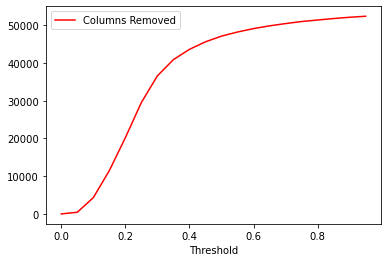

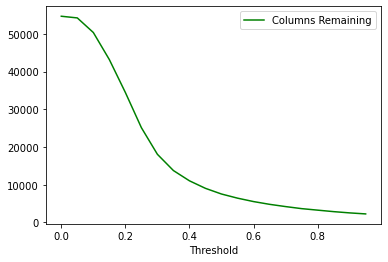

In [27]:
low_var_pd.plot.line(x='Threshold', y='Columns Removed', c='r')
low_var_pd.plot.line(x='Threshold', y='Columns Remaining', c='g')

conclusion dos gráficos?

## 2.2 Using Principal Component Analysis

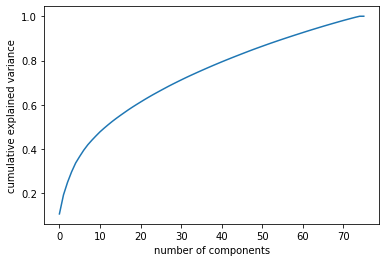

In [28]:
pca = PCA().fit(X) 
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

As we can see the first 10 components contain approximately 50% of the variance

We'd need about 50 components to retain 90% of the variance (we would recover most of the essential characteristics of X_train)

In [29]:
pca = PCA(0.95)
X_pca = pca.fit_transform(X)

In [30]:
explained_variance = pca.explained_variance_ratio_

In [31]:
print("Explained Variance: %s" % len(pca.explained_variance_ratio_))

Explained Variance: 66


At the end of this step you should have two new matrices with the same number of rows, each with a different number of columns (features): X_variance and X_PCA.

In [32]:
X_variance = X_low_variance
X_PCA = X_pca

In [33]:
X_variance.shape

(76, 3257)

In [34]:
X_PCA.shape

(76, 66)

With Removing features with low variance it reduced the number of features to 3257

And with PCA to 66 features

## 3. Clustering Samples using Partitional Clustering

Use **`K`-means** to cluster the samples:

* Cluster the original data (54.675 features): **X**.
    * Use different values of `K`.
    * For each value of `K` present the clustering by specifying how many samples MB-CL and Other are in each cluster.     
    For instance, `{0: {'MB-CL': 51, 'Other': 0}, 1: {'MB-CL': 0, 'Other': 25}}` is the ideal clustering that we aimed at obtained with K-means when `K=2`, where the first cluster has 51 MB-CL samples and 0 Other samples and the second cluster has 0 MB-CL samples and 25 Other samples.
    You can choose how to output this information.  **Tip**: You can explore the usage of contigency matrices.
    * What is the best value of `K` ? Justify using the clustering results and the [Silhouette score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html).

* Cluster the data obtained after removing features with low variance: **X_variance**.
    * Study different values of `K` as above.

* Cluster the data obtained after applying PCA: **X_PCA**.
    * Study different values of `K` as above.

* Compare the results obtained in the three datasets above for the best `K`. 
* Discuss the results.

In [35]:
from collections import Counter
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

This function does: ------

In [36]:
def get_samples_per_cluster_kmeans(k, X):
    labels = np.array(y['class'])
    for k in range(2, k):
        kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
        pred_classes = kmeans.labels_
        print('For K =', k)
        for i in np.array(np.unique(pred_classes)):
            print('Cluster ', i, dict(Counter(labels[np.where(pred_classes == i)]))) 

In [37]:
def get_ss_kmeans(k,X):
    slc = {}
    for k in range(2, k):
        kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
        pred_classes = kmeans.labels_
        slc[k] = silhouette_score(X,pred_classes)
        print("For K =", k, "The avg SS is :", np.round(silhouette_score(X, pred_classes),2))
    plt.figure()
    plt.plot(list(slc.keys()), list(slc.values()))
    plt.xlabel("Number of clusters K")
    plt.ylabel("Silhouette scores")
    plt.show()  

In [38]:
def comparing_ss_kmeans(k,X1, X2, X3):
    slc1, slc2, slc3 = {}, {}, {}
    for k in range(2, k):
        kmeans1 = KMeans(n_clusters=k, random_state=0).fit(X1)
        pred_classes1 = kmeans1.labels_
        slc1[k] = silhouette_score(X1,pred_classes1)
        
        kmeans2 = KMeans(n_clusters=k, random_state=0).fit(X2)
        pred_classes2 = kmeans2.labels_
        slc2[k] = silhouette_score(X2,pred_classes2)
        
        kmeans3 = KMeans(n_clusters=k, random_state=0).fit(X3)
        pred_classes3 = kmeans3.labels_
        slc3[k] = silhouette_score(X3,pred_classes3)
        
    plt.figure()
    plt.plot(list(slc1.keys()), list(slc1.values()), label='X')
    plt.legend(loc="upper right")
    plt.plot(list(slc2.keys()), list(slc2.values()), label='X_variance')
    plt.legend(loc="upper right")
    plt.plot(list(slc3.keys()), list(slc3.values()), label='X_PCA')
    plt.legend(loc="upper right")
    plt.xlabel("Number of Clusters K")
    plt.ylabel("Silhouette Scores")
    plt.title('Comparing SS')
    plt.show()  

## 3.1 For the original data X

* Cluster the original data (54.675 features): **X**.
    * Use different values of `K`.
    * For each value of `K` present the clustering by specifying how many samples MB-CL and Other are in each cluster.     
    For instance, `{0: {'MB-CL': 51, 'Other': 0}, 1: {'MB-CL': 0, 'Other': 25}}` is the ideal clustering that we aimed at obtained with K-means when `K=2`, where the first cluster has 51 MB-CL samples and 0 Other samples and the second cluster has 0 MB-CL samples and 25 Other samples.
    You can choose how to output this information.  **Tip**: You can explore the usage of contigency matrices.
    * What is the best value of `K` ? Justify using the clustering results and the [Silhouette score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html).



In [39]:
get_samples_per_cluster_kmeans(6, X) 

For K = 2
Cluster  0 {'MB-CL': 40, 'Other': 15}
Cluster  1 {'MB-CL': 11, 'Other': 10}
For K = 3
Cluster  0 {'MB-CL': 11, 'Other': 9}
Cluster  1 {'MB-CL': 28, 'Other': 5}
Cluster  2 {'Other': 11, 'MB-CL': 12}
For K = 4
Cluster  0 {'MB-CL': 24, 'Other': 4}
Cluster  1 {'Other': 12, 'MB-CL': 16}
Cluster  2 {'Other': 7, 'MB-CL': 3}
Cluster  3 {'MB-CL': 8, 'Other': 2}
For K = 5
Cluster  0 {'Other': 8, 'MB-CL': 3}
Cluster  1 {'MB-CL': 23, 'Other': 6}
Cluster  2 {'MB-CL': 11, 'Other': 2}
Cluster  3 {'MB-CL': 8, 'Other': 1}
Cluster  4 {'Other': 8, 'MB-CL': 6}


For K = 2 The avg SS is : 0.1
For K = 3 The avg SS is : 0.07
For K = 4 The avg SS is : 0.09
For K = 5 The avg SS is : 0.08


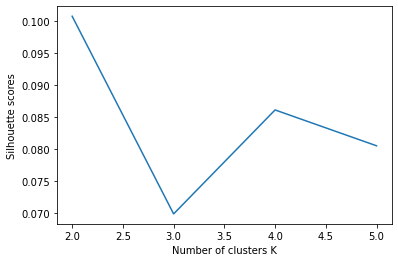

In [40]:
get_ss_kmeans(6,X)

## 3.2 X_variance

In [41]:
get_samples_per_cluster_kmeans(6, X_variance)

For K = 2
Cluster  0 {'MB-CL': 40, 'Other': 15}
Cluster  1 {'MB-CL': 11, 'Other': 10}
For K = 3
Cluster  0 {'Other': 8, 'MB-CL': 8}
Cluster  1 {'MB-CL': 32, 'Other': 7}
Cluster  2 {'MB-CL': 11, 'Other': 10}
For K = 4
Cluster  0 {'Other': 13, 'MB-CL': 18}
Cluster  1 {'MB-CL': 8}
Cluster  2 {'Other': 8, 'MB-CL': 3}
Cluster  3 {'MB-CL': 22, 'Other': 4}
For K = 5
Cluster  0 {'Other': 8, 'MB-CL': 3}
Cluster  1 {'Other': 6, 'MB-CL': 13}
Cluster  2 {'MB-CL': 22, 'Other': 4}
Cluster  3 {'MB-CL': 5, 'Other': 7}
Cluster  4 {'MB-CL': 8}


For K = 2 The avg SS is : 0.2
For K = 3 The avg SS is : 0.16
For K = 4 The avg SS is : 0.18
For K = 5 The avg SS is : 0.15


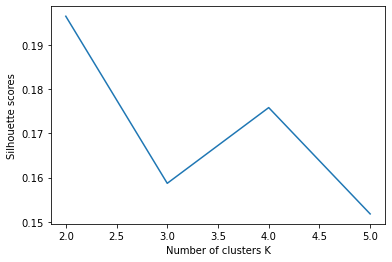

In [42]:
get_ss_kmeans(6,X_variance)

## 3.3 X_PCA

In [43]:
get_samples_per_cluster_kmeans(6, X_PCA)

For K = 2
Cluster  0 {'MB-CL': 40, 'Other': 15}
Cluster  1 {'MB-CL': 11, 'Other': 10}
For K = 3
Cluster  0 {'MB-CL': 12, 'Other': 10}
Cluster  1 {'MB-CL': 29, 'Other': 5}
Cluster  2 {'Other': 10, 'MB-CL': 10}
For K = 4
Cluster  0 {'MB-CL': 24, 'Other': 4}
Cluster  1 {'Other': 12, 'MB-CL': 16}
Cluster  2 {'Other': 8, 'MB-CL': 3}
Cluster  3 {'MB-CL': 8, 'Other': 1}
For K = 5
Cluster  0 {'MB-CL': 22, 'Other': 5}
Cluster  1 {'MB-CL': 8, 'Other': 3}
Cluster  2 {'Other': 7, 'MB-CL': 3}
Cluster  3 {'Other': 8, 'MB-CL': 6}
Cluster  4 {'MB-CL': 12, 'Other': 2}


For K = 2 The avg SS is : 0.11
For K = 3 The avg SS is : 0.08
For K = 4 The avg SS is : 0.09
For K = 5 The avg SS is : 0.09


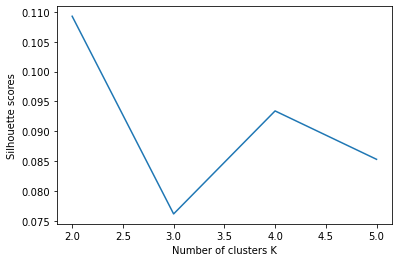

In [44]:
get_ss_kmeans(6,X_PCA)

## 3.4 Comparing all

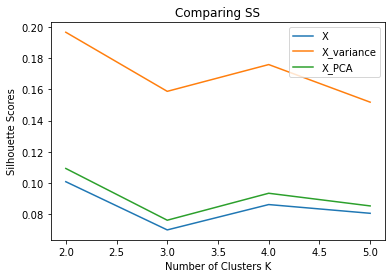

In [45]:
comparing_ss_kmeans(6,X, X_variance, X_PCA)


- Partitional clustering divides data objects into nonoverlapping groups. As such, object can be a member of more than one cluster, and every cluster must have at least one object.

- Silhouette score is used to evaluate the quality of clusters (how well samples are clustered with other samples that are similar to each other.)


- For all three datasets, we observed that the best K (the one that yieled the highest Silhouette Score) was 2, meaning that there are two clusters - which could indicate that when we proceed with feature selection with the selected variance threshold in (2), 2 can be the number of optimal clusters).

- Keeping in mind that the best value for the SS is 1 and that values near 0 indicate overlapping clusters, we observed that when K=2, the average SS was the highest for the X_variance dataset (0.2), followed by X_PCA (0.12) and lastly the original X (0.1)

## 4. Clustering Samples using Hierarchical Clustering

Use a **Hierarchical Clustering Algorithm (HCA)** to cluster the samples: 

* Cluster the data in **X_variance**.
    * Use **different linkage metrics**.
    * Use different values of `K`.
    * For each linkage metric and value of `K` present the clustering by specifying how many MB-CL and Other samples are in each cluster as you did before. 
    * What is the best linkage metric and the best value of `K`? Justify using the clustering results and the [Silhouette score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html).

* Cluster the data in **X_PCA**.
    * Study different linkage metrics and different values of `K` as above.

* Compare the results obtained in the two datasets above for the best linkage metric and the best `K`. 
* Discuss the results

In [46]:
from sklearn.cluster import AgglomerativeClustering

descrever o q a função faz

In [47]:
def get_samples_per_cluster_hca(k, X):
    labels = np.array(y['class'])
    linkage = ['ward', 'complete', 'average', 'single']
    for k in range(2, k):
        print('For K =', k)
        for l in linkage:
            print('Linkage method =',l)
            clustering = AgglomerativeClustering(linkage=l,n_clusters=k).fit(X)
            pred_classes = clustering.labels_
            for i in np.array(np.unique(pred_classes)):
                print('Cluster ', i, dict(Counter(labels[np.where(pred_classes == i)])))

In [48]:
def comparing_ss_hca_methods(k,X):
    slc1, slc2, slc3, slc4 = {}, {}, {}, {}
    for k in range(2, k):
        hca1 = AgglomerativeClustering(n_clusters=k, linkage='ward').fit(X)
        pred_classes1 = hca1.labels_
        slc1[k] = silhouette_score(X,pred_classes1)

        hca2 = AgglomerativeClustering(n_clusters=k, linkage='complete').fit(X)
        pred_classes2 = hca2.labels_
        slc2[k] = silhouette_score(X,pred_classes2)

        hca3 = AgglomerativeClustering(n_clusters=k, linkage='average').fit(X)
        pred_classes3 = hca3.labels_
        slc3[k] = silhouette_score(X,pred_classes3)
             
    plt.figure()
    plt.plot(list(slc1.keys()), list(slc1.values()), label='Ward method')
    plt.legend(loc="upper right")
    plt.plot(list(slc2.keys()), list(slc2.values()), label='Complete method')
    plt.legend(loc="upper right")
    plt.plot(list(slc3.keys()), list(slc3.values()), label='Average method')
    plt.legend(loc="upper right")

    plt.xlabel("Number of Clusters K")
    plt.ylabel("Silhouette Scores")
    plt.title('Comparing SS')
    plt.show()  

In [49]:
get_samples_per_cluster_hca(6, X_variance)

For K = 2
Linkage method = ward
Cluster  0 {'MB-CL': 40, 'Other': 18}
Cluster  1 {'MB-CL': 11, 'Other': 7}
Linkage method = complete
Cluster  0 {'MB-CL': 51, 'Other': 24}
Cluster  1 {'Other': 1}
Linkage method = average
Cluster  0 {'MB-CL': 51, 'Other': 24}
Cluster  1 {'Other': 1}
Linkage method = single
Cluster  0 {'MB-CL': 51, 'Other': 24}
Cluster  1 {'Other': 1}
For K = 3
Linkage method = ward
Cluster  0 {'MB-CL': 11, 'Other': 7}
Cluster  1 {'MB-CL': 31, 'Other': 7}
Cluster  2 {'Other': 11, 'MB-CL': 9}
Linkage method = complete
Cluster  0 {'MB-CL': 40, 'Other': 17}
Cluster  1 {'Other': 1}
Cluster  2 {'MB-CL': 11, 'Other': 7}
Linkage method = average
Cluster  0 {'MB-CL': 43, 'Other': 22}
Cluster  1 {'Other': 1}
Cluster  2 {'MB-CL': 8, 'Other': 2}
Linkage method = single
Cluster  0 {'MB-CL': 43, 'Other': 24}
Cluster  1 {'Other': 1}
Cluster  2 {'MB-CL': 8}
For K = 4
Linkage method = ward
Cluster  0 {'MB-CL': 31, 'Other': 7}
Cluster  1 {'MB-CL': 8}
Cluster  2 {'Other': 11, 'MB-CL': 9}
C

In [50]:
get_samples_per_cluster_hca(6, X_PCA)

For K = 2
Linkage method = ward
Cluster  0 {'MB-CL': 21, 'Other': 18}
Cluster  1 {'MB-CL': 30, 'Other': 7}
Linkage method = complete
Cluster  0 {'MB-CL': 50, 'Other': 24}
Cluster  1 {'MB-CL': 1, 'Other': 1}
Linkage method = average
Cluster  0 {'MB-CL': 51, 'Other': 24}
Cluster  1 {'Other': 1}
Linkage method = single
Cluster  0 {'MB-CL': 51, 'Other': 24}
Cluster  1 {'Other': 1}
For K = 3
Linkage method = ward
Cluster  0 {'MB-CL': 13, 'Other': 9}
Cluster  1 {'MB-CL': 30, 'Other': 7}
Cluster  2 {'Other': 9, 'MB-CL': 8}
Linkage method = complete
Cluster  0 {'MB-CL': 1, 'Other': 1}
Cluster  1 {'MB-CL': 37, 'Other': 22}
Cluster  2 {'MB-CL': 13, 'Other': 2}
Linkage method = average
Cluster  0 {'MB-CL': 50, 'Other': 24}
Cluster  1 {'Other': 1}
Cluster  2 {'MB-CL': 1}
Linkage method = single
Cluster  0 {'MB-CL': 50, 'Other': 24}
Cluster  1 {'Other': 1}
Cluster  2 {'MB-CL': 1}
For K = 4
Linkage method = ward
Cluster  0 {'MB-CL': 30, 'Other': 7}
Cluster  1 {'MB-CL': 10, 'Other': 2}
Cluster  2 {'O

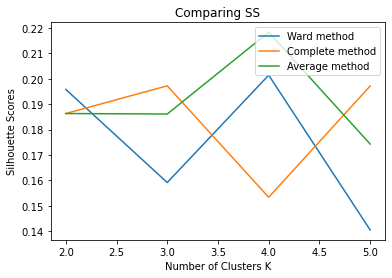

In [51]:
comparing_ss_hca_methods(6,X_variance)

Analisar graºfico:--

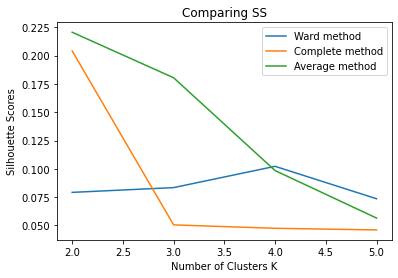

In [52]:
comparing_ss_hca_methods(6,X_PCA)

Analisar graºfico:--

## 5. Evaluating Clustering Results

In this task you should compare the best results obtained using `K`-means and HCA 
1. **Without using ground truth**
2. **Using ground truth (`Medulloblastoma Type`)**.

### 5.1. Without Using Ground Truth

**Choose one adequate measure** from those available by Sciki-learn (https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation) to evaluate the different clusterings. 

Discuss the results.

In [53]:
# Write code in cells like this ...
#https://stats.stackexchange.com/questions/21807/evaluation-measures-of-goodness-or-validity-of-clustering-without-having-truth

### 5.2. Using Ground Truth

**Choose one adequate measure** from those available by Sciki-learn (https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation) to evaluate the different clusterings. 

Discuss the results.

In [54]:
import operator

In [55]:
def comparing_kmeans_ground_truth(k,X):
    labels_true=y['class']
    slc = {}
    for k in range(2, k):
        kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
        pred_classes = kmeans.labels_
        slc[k] = silhouette_score(X,pred_classes)
    highest_ss_k = max(mydict.items(), key=operator.itemgetter(1))[0]
    kmeans = KMeans(n_clusters=highest_ss_k, random_state=0).fit(X)
    labels = kmeans.labels_
    print('For K =', highest_ss_k)
    print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
    print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
    print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
    print("Adjusted Rand Index: %0.3f"
          % metrics.adjusted_rand_score(labels_true, labels))
    print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))

In [56]:
comparing_kmeans_ground_truth(6,X)

NameError: name 'mydict' is not defined

In [ ]:
comparing_kmeans_ground_truth(6,X_variance)

In [ ]:
comparing_kmeans_ground_truth(6,X_PCA)

In [ ]:
def comparing_hca_ground_truth(k,X):
    labels_true=y['class']
    slc = {}
    for k in range(2, k):
        hca = AgglomerativeClustering(n_clusters=k).fit(X)
        pred_classes = hca.labels_
        slc[k] = silhouette_score(X,pred_classes)
        
    highest_ss_k = max(mydict.items(), key=operator.itemgetter(1))[0]
    hca1 = AgglomerativeClustering(n_clusters=highest_ss_k).fit(X)
    labels = hca1.labels_
    
    print('For K =', highest_ss_k)
    print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
    print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
    print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
    print("Adjusted Rand Index: %0.3f"
          % metrics.adjusted_rand_score(labels_true, labels))
    print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))

In [ ]:
comparing_hca_ground_truth(6,X)

In [ ]:
comparing_hca_ground_truth(6,X_variance)

In [ ]:
comparing_hca_ground_truth(11,X_PCA)

## 6. Clustering Samples using Density-based Clustering

Use DBSCAN (https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html) or OPTICS (https://scikit-learn.org/stable/modules/generated/sklearn.cluster.OPTICS.html) to cluster the samples.

Compare the results with those of K-means and HCA.

https://www.kdnuggets.com/2020/04/dbscan-clustering-algorithm-machine-learning.html

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.cluster import OPTICS, cluster_optics_dbscan

In [ ]:
def dbscan_func(X):
    db = DBSCAN(min_samples=10).fit(X)
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    labels = db.labels_
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise_ = list(labels).count(-1)

    print('Estimated number of clusters = %d' % n_clusters_)
    print('Estimated number of noise points = %d' % n_noise_)

In [ ]:
dbscan_func(X)

In [ ]:
dbscan_func(X_variance)

In [ ]:
dbscan_func(X_PCA)

## 7. Choose a Different Clustering Algorithm to Group the Samples

Choose **a clustering algorithm** besides `K`-means, HCA and DBSCAN/OPTICS to cluster the samples. 

**Groups of 3 People** must choose two different algorithms.

Justify your choice and compare the results with those of `K`-means, HCA and DBSCAN/OPTICS.

In [ ]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import SpectralClustering

In [ ]:
def get_samples_per_cluster_mini_kmeans(k, X):
    labels = np.array(y['class'])
    for k in range(2, k):
        mini_kmeans = MiniBatchKMeans(n_clusters=k, random_state=0).fit(X)
        pred_classes = mini_kmeans.labels_

        print('For K =', k)
        for i in np.array(np.unique(pred_classes)):
            print('Cluster ', i, dict(Counter(labels[np.where(pred_classes == i)]))) #labels -- ver

In [ ]:
def get_ss_mini_kmeans(k,X):
    slc = {}
    for k in range(2, k):
        kmeans = MiniBatchKMeans(n_clusters=k, random_state=0).fit(X)
        pred_classes = kmeans.labels_
        slc[k] = silhouette_score(X,pred_classes)
        print("For K =", k, "The avg SS is :", np.round(silhouette_score(X, pred_classes),2))
    plt.figure()
    plt.plot(list(slc.keys()), list(slc.values()))
    plt.xlabel("Number of clusters K")
    plt.ylabel("Silhouette scores")
    plt.show()  

In [ ]:
def get_samples_per_cluster_spec(k, X):
    labels = np.array(y['class'])
    for k in range(2, k):
        mini_kmeans = SpectralClustering(n_clusters=k, random_state=0).fit(X)
        pred_classes = mini_kmeans.labels_

        print('For K =', k)
        for i in np.array(np.unique(pred_classes)):
            print('Cluster ', i, dict(Counter(labels[np.where(pred_classes == i)]))) #labels -- ver

In [ ]:
def get_ss_mini_spec(k,X):
    slc = {}
    for k in range(2, k):
        kmeans = SpectralClustering(n_clusters=k, random_state=0).fit(X)
        pred_classes = kmeans.labels_
        slc[k] = silhouette_score(X,pred_classes)
        print("For K =", k, "The avg SS is :", np.round(silhouette_score(X, pred_classes),2))
    plt.figure()
    plt.plot(list(slc.keys()), list(slc.values()))
    plt.xlabel("Number of clusters K")
    plt.ylabel("Silhouette scores")
    plt.show()  

In [ ]:
get_samples_per_cluster_mini_kmeans(6,X)

In [ ]:
get_samples_per_cluster_mini_kmeans(6,X_variance)

In [ ]:
get_samples_per_cluster_mini_kmeans(6,X_PCA)

In [ ]:
get_ss_mini_kmeans(11,X)

In [ ]:
get_ss_mini_kmeans(6,X_variance)

In [ ]:
get_ss_mini_kmeans(6,X_PCA)

In [ ]:
get_samples_per_cluster_spec(6, X)

In [ ]:
get_samples_per_cluster_spec(6, X_variance)

In [ ]:
get_samples_per_cluster_spec(11, X_PCA)

In [ ]:
get_ss_mini_spec(11,X)

In [ ]:
get_ss_mini_spec(6,X_variance)

In [ ]:
get_ss_mini_spec(6,X_PCA)

## 8. Conclusions

Draw some conclusions about this project work. Can you highlight some insights about meduloblastoma types? 

In [ ]:
# Write code in cells like this ...

Write text in cells like this...